# Austin Crime Data - How Fast the Incidents are Reported

This project is designed to understand the crime data in Austin, TX. The data was retrieved on August 3 2020 https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu. We will explore the distribution of crimes over the time, and over the locations and we will create a model to predict the report duration based on the features given

## A. Data Wrangling

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# Since we have so many columns in the dataframe, we need to change the Pandas settings to observe the data frame more efficiently:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 50
pd.options.display.min_rows = 20

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import the csv file: Crime_Reports
df = pd.read_csv(r'C:\Users\Servet\Desktop\Project 2\Crime_Reports.csv',index_col=False)

#Check how this data looks lile
df.head()

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20183000009,DATING DISTURBANCE,2400,N,10/27/2018 12:03:00 AM,10/27/2018,3.0,10/27/2018 12:28:00 AM,10/27/2018,28.0,PARKING LOTS / GARAGE,2201 MONTOPLOIS DR,NaN,NaN,NaN,NaN,NaN,NaN,N,10/31/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20141381413,FAMILY DISTURBANCE,3400,N,05/18/2014 07:09:00 PM,05/18/2014,1909.0,05/18/2014 07:09:00 PM,05/18/2014,1909.0,RESIDENCE / HOME,12836 BUENOS ARIES PKWY,NaN,NaN,NaN,NaN,NaN,NaN,N,05/26/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20081002040,CRASH/FAIL STOP AND RENDER AID,3604,N,04/09/2008 07:04:00 PM,04/09/2008,1904.0,04/09/2008 09:08:00 PM,04/09/2008,2108.0,STREETS / HWY / ROAD / ALLEY,2500 BLOCK OF GUADALUPE,NaN,NaN,NaN,NaN,NaN,NaN,N,12/16/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20161971680,DWI,2100,N,07/15/2016 10:15:00 PM,07/15/2016,2215.0,07/16/2016 12:22:00 AM,07/16/2016,22.0,STREETS / HWY / ROAD / ALLEY,6000 BLK OF BOLM RD,NaN,NaN,NaN,NaN,NaN,NaN,C,01/03/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20135029070,PROTECTIVE ORDER,3829,N,06/28/2013 12:15:00 PM,06/28/2013,1215.0,06/28/2013 12:15:00 PM,06/28/2013,1215.0,RESIDENCE / HOME,COHISE COUNTY AZ,NaN,NaN,NaN,NaN,NaN,NaN,N,06/28/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# There were so may NaN's at the head, so we will check the tail as well
df.tail()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2255900,20175007735,HARASSMENT,2703,N,01/31/2017 10:31:00 AM,01/31/2017,1031.0,02/23/2017 10:31:00 AM,02/23/2017,1031.0,RESIDENCE / HOME,9802 ROXANNA DR,78748.0,5.0,FR,1,535,17.47,N,03/16/2017,NaN,NaN,3088221.0,3088221.0,30.176236,-97.827862,"(30.17623555, -97.82786218)"
2255901,20108800371,CRIMINAL TRESPASS/TRANSIENT,2721,N,03/29/2010 07:17:00 AM,03/29/2010,717.0,03/29/2010 07:17:00 AM,03/29/2010,717.0,CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,203 E 10TH ST,78701.0,9.0,GE,1,379,11.00,N,03/30/2010,NaN,NaN,3115283.0,3115283.0,30.271040,-97.739653,"(30.27103998, -97.73965326)"
2255902,2003924076801,BURGLARY OF RESIDENCE,500,N,01/04/2003 06:30:00 PM,01/04/2003,1830.0,01/05/2003 10:31:00 AM,01/05/2003,1031.0,RESIDENCE / HOME,1809 SANCHEZ ST,78702.0,1.0,CH,3,394,8.00,N,NaN,220,Burglary,3125587.0,3125587.0,30.281489,-97.706719,"(30.28148881, -97.70671938)"
2255903,2006902409,BURGLARY NON RESIDENCE,502,N,03/31/2006 10:46:00 PM,03/31/2006,2246.0,03/31/2006 10:46:00 PM,03/31/2006,2246.0,COMMERCIAL / OFFICE BUILDING,6016 OLD FREDERICKSBURG RD,78749.0,8.0,DA,6,78,NaN,NaN,05/10/2006,220,Burglary,3081299.0,3081299.0,30.234197,-97.848283,"(30.2341966, -97.8482829)"
2255904,2010232299,FAMILY DISTURBANCE,3400,N,01/23/2010 10:44:00 PM,01/23/2010,2244.0,01/24/2010 12:14:00 AM,01/24/2010,14.0,RESIDENCE / HOME,9307 GEORGIAN DR,78753.0,4.0,ED,1,250,18.00,N,02/06/2010,NaN,NaN,3129098.0,3129098.0,30.360317,-97.693437,"(30.36031662, -97.69343723)"


In [4]:
# We would like to rename all columns with lowercase
df.columns = map(str.lower, df.columns)

# Then we will replace whitespaces by '_'
df.columns = df.columns.str.replace(' ', '_')

df.head()

,incident_number,highest_offense_description,highest_offense_code,family_violence,occurred_date_time,occurred_date,occurred_time,report_date_time,report_date,report_time,location_type,address,zip_code,council_district,apd_sector,apd_district,pra,census_tract,clearance_status,clearance_date,ucr_category,category_description,x-coordinate,y-coordinate,latitude,longitude,location
0,20183000009,DATING DISTURBANCE,2400,N,10/27/2018 12:03:00 AM,10/27/2018,3.0,10/27/2018 12:28:00 AM,10/27/2018,28.0,PARKING LOTS / GARAGE,2201 MONTOPLOIS DR,NaN,NaN,NaN,NaN,NaN,NaN,N,10/31/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20141381413,FAMILY DISTURBANCE,3400,N,05/18/2014 07:09:00 PM,05/18/2014,1909.0,05/18/2014 07:09:00 PM,05/18/2014,1909.0,RESIDENCE / HOME,12836 BUENOS ARIES PKWY,NaN,NaN,NaN,NaN,NaN,NaN,N,05/26/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20081002040,CRASH/FAIL STOP AND RENDER AID,3604,N,04/09/2008 07:04:00 PM,04/09/2008,1904.0,04/09/2008 09:08:00 PM,04/09/2008,2108.0,STREETS / HWY / ROAD / ALLEY,2500 BLOCK OF GUADALUPE,NaN,NaN,NaN,NaN,NaN,NaN,N,12/16/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20161971680,DWI,2100,N,07/15/2016 10:15:00 PM,07/15/2016,2215.0,07/16/2016 12:22:00 AM,07/16/2016,22.0,STREETS / HWY / ROAD / ALLEY,6000 BLK OF BOLM RD,NaN,NaN,NaN,NaN,NaN,NaN,C,01/03/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20135029070,PROTECTIVE ORDER,3829,N,06/28/2013 12:15:00 PM,06/28/2013,1215.0,06/28/2013 12:15:00 PM,06/28/2013,1215.0,RESIDENCE / HOME,COHISE COUNTY AZ,NaN,NaN,NaN,NaN,NaN,NaN,N,06/28/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In order to perform any machine learning algorithm, we need to make sure that there is no missing values. Let's check the data types and the missing values in each column:

In [5]:
# We will check the datatype of each column
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255905 entries, 0 to 2255904
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   incident_number              2255905 non-null  int64  
 1   highest_offense_description  2255905 non-null  object 
 2   highest_offense_code         2255905 non-null  int64  
 3   family_violence              2255905 non-null  object 
 4   occurred_date_time           2255740 non-null  object 
 5   occurred_date                2255905 non-null  object 
 6   occurred_time                2255821 non-null  float64
 7   report_date_time             2255904 non-null  object 
 8   report_date                  2255905 non-null  object 
 9   report_time                  2255904 non-null  float64
 10  location_type                2235048 non-null  object 
 11  address                      2255893 non-null  object 
 12  zip_code                     2242200 non-n

In [6]:
# Let's check the total missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_df = pd.concat([missing_values,df[missing_values.index].dtypes], axis=1, keys=['Total','Data Types'],sort=False)
missing_df[missing_df['Total']>=1]

,Total,Data Types
category_description,1490159,object
ucr_category,1490159,object
census_tract,1316664,float64
clearance_status,601963,object
clearance_date,332750,object
council_district,46742,float64
longitude,37995,float64
location,37995,object
latitude,37995,float64
location_type,20857,object


In data wrangling, our first goal is to create a target variable, whih is defined by the time elapsed between the occurrence and reporting. We will use 'duration' as the column name.

In [7]:
# Since there are not many missing datetime objects and misplacement on those objects will create a noise, we can just drop the rows with missing occurred_date_time
df = df[pd.notnull(df['occurred_date_time'])]

# Let's check the total missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_df = pd.concat([missing_values,df[missing_values.index].dtypes], axis=1, keys=['Total','Data Types'],sort=False)
missing_df[missing_df['Total']>=1]

,Total,Data Types
category_description,1490061,object
ucr_category,1490061,object
census_tract,1316561,float64
clearance_status,601927,object
clearance_date,332684,object
council_district,46729,float64
longitude,37989,float64
location,37989,object
latitude,37989,float64
location_type,20773,object


The purpose of the project is to predict the time elapsed between the occurence of an incident and the reporting time. So we need to wrangle the datetime objects:

In [8]:
# We need to format report_date_time and occurred_date_tim as datetime data type.
df['report_date_time'] = pd.to_datetime(df['report_date_time'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
df['occurred_date_time'] = pd.to_datetime(df['occurred_date_time'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')

In [9]:
# We will define a new column: "duration" as the difference between occurred and report time
df['duration'] = pd.to_datetime(df['report_date_time']) - pd.to_datetime(df['occurred_date_time'])
df['duration'] = df['duration'].dt.total_seconds()

In [10]:
df['duration'].describe()

count    2.255740e+06
mean     6.681036e+05
std      7.950372e+06
min     -5.270400e+06
25%      0.000000e+00
50%      6.000000e+01
75%      3.552000e+04
max      5.140874e+08
Name: duration, dtype: float64

We can see that some of the durations are negative which looks erroneous

In [11]:
# Let's check how many duration values are negative
np.sum((df['duration'] < 0).values.ravel())

21

In [12]:
# Duration cannot be negative, so we need to convert negative values to positive
df['duration_is_negative'] = np.where(df["duration"]<0,1,0)
df['duration'] = np.where(df['duration']<0, df['duration'].abs(), df['duration'])
print(df['duration'].describe())

# We will check how many duration values are 'zero'
print("{} of the duration values are zero".format(df.duration.value_counts()[0]))

count    2.255740e+06
mean     6.681106e+05
std      7.950372e+06
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+01
75%      3.552000e+04
max      5.140874e+08
Name: duration, dtype: float64
1120291 of the duration values are zero


In [13]:
# We will check what might be the cut score for outliers
df['duration'].sort_values(ascending=False).head(20)

285003     514087440.0
1183353    507525540.0
352501     504921600.0
606424     504921600.0
39874      502320060.0
197247     501292800.0
741178     494048940.0
1628767    492302880.0
41017      490978800.0
961924     487383300.0
34713      483754320.0
1227805    481263000.0
2004522    480816000.0
1526829    473385600.0
1222067    473299200.0
375586     465599640.0
510471     465004020.0
1839290    463923600.0
1915550    463449600.0
2225056    460080000.0
Name: duration, dtype: float64

In [14]:
# We will remove the outliers
df['duration'] = np.where(df['duration']>7000, df['duration'].mean(), df['duration'])

In [15]:
# We can fill in some of the object types with 'Nan'

df['address_isnull'] = df['address'].isnull().astype(int)
df['address'] = df['address'].fillna('NaN')

df['apd_sector_isnull'] = df['apd_sector'].isnull().astype(int)
df['apd_sector'] = df['apd_sector'].fillna('NaN')

df['apd_district_isnull'] = df['apd_district'].isnull().astype(int)
df['apd_district'] = df['apd_district'].fillna('NaN')

df['location_type_isnull'] = df['location_type'].isnull().astype(int)
df['location_type'] = df['location_type'].fillna('NaN')

df['location_isnull'] = df['location'].isnull().astype(int)
df['location'] = df['location'].fillna('NaN')

df['clearance_date_isnull'] = df['clearance_date'].isnull().astype(int)
df['clearance_date'] = df['clearance_date'].fillna('NaN')

df['clearance_status_isnull'] = df['clearance_status'].isnull().astype(int)
df['clearance_status'] = df['clearance_status'].fillna('NaN')

df['ucr_category_isnull'] = df['ucr_category'].isnull().astype(int)
df['ucr_category'] = df['ucr_category'].fillna('NaN')

df['category_description_isnull'] = df['category_description'].isnull().astype(int)
df['category_description'] = df['category_description'].fillna('NaN')

df['pra_isnull'] = df['pra'].isnull().astype(int)
df['pra'] = df['pra'].fillna('NaN')

In [16]:
# We will check whether there are outliers in the numeric data
df.describe()

,incident_number,highest_offense_code,occurred_time,report_time,zip_code,council_district,census_tract,x-coordinate,y-coordinate,latitude,longitude,duration,duration_is_negative,address_isnull,apd_sector_isnull,apd_district_isnull,location_type_isnull,location_isnull,clearance_date_isnull,clearance_status_isnull,ucr_category_isnull,category_description_isnull,pra_isnull
count,2.255740e+06,2.255740e+06,2.255740e+06,2.255740e+06,2.242048e+06,2.209011e+06,939179.000000,2.245946e+06,2.245946e+06,2.217751e+06,2.217751e+06,2.255740e+06,2.255740e+06,2.255740e+06,2.255740e+06,2.255740e+06,2.255740e+06,2.255740e+06,2.255740e+06,2.255740e+06,2.255740e+06,2.255740e+06,2.255740e+06
mean,6.791492e+10,1.770881e+03,1.326681e+03,1.324830e+03,7.872995e+04,4.938217e+00,191.886758,3.077864e+06,3.077864e+06,3.028863e+01,-9.773381e+01,2.369839e+05,9.309584e-06,5.319762e-06,3.854168e-03,4.061638e-03,9.208951e-03,1.684104e-02,1.474833e-01,2.668424e-01,6.605642e-01,6.605642e-01,4.601151e-03
std,3.136600e+11,1.196743e+03,7.209049e+02,6.698262e+02,4.147807e+02,2.849442e+00,6830.065499,3.633839e+05,3.633839e+05,1.796235e-01,2.901056e-01,3.192155e+05,3.051147e-03,2.306455e-03,6.196220e-02,6.360144e-02,9.552042e-02,1.286757e-01,3.545871e-01,4.423094e-01,4.735180e-01,4.735180e-01,6.767557e-02
min,2.003500e+04,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,-3.262185e+07,-3.262185e+07,1.204500e-04,-9.918164e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.005162e+10,6.010000e+02,8.060000e+02,9.000000e+02,7.870500e+04,3.000000e+00,17.130000,3.108729e+06,3.108729e+06,3.023259e+01,-9.775845e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.009504e+10,1.400000e+03,1.432000e+03,1.407000e+03,7.874100e+04,4.000000e+00,18.330000,3.117210e+06,3.117210e+06,3.027349e+01,-9.773245e+01,6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
75%,2.014504e+10,2.721000e+03,1.935000e+03,1.900000e+03,7.875200e+04,7.000000e+00,23.120000,3.126403e+06,3.126403e+06,3.034673e+01,-9.770253e+01,6.681106e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,2.020202e+12,8.905000e+03,2.359000e+03,2.359000e+03,7.875900e+04,1.000000e+01,960100.000000,3.889524e+07,3.889524e+07,4.216665e+01,-1.335600e-04,6.681106e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
# There are some outliers in latitude and longitude. The neighborhoods in Austin have between 29.8-31.2 in latitude and -97.2- -98.2 in longitude
df['latitude'] = np.where(df['latitude']<29.8, df['latitude'].mean(), df['latitude'])
df['latitude'] = np.where(df['latitude']>31.2, df['latitude'].mean(), df['latitude'])

df['longitude'] = np.where(df['longitude']<-98.2, df['longitude'].mean(), df['longitude'])
df['longitude'] = np.where(df['longitude']>-97.2, df['longitude'].mean(), df['longitude'])

In [18]:
df['zip_code_isnull'] = df['zip_code'].isnull().astype(int)
df['zip_code'] = df['zip_code'].fillna(78000)

In [19]:
# Since there are less missing values in zip_code, we will use groupby to fill some of the missing values of latitude and longitude based on zip_code
df['longitude_isnull'] = df['longitude'].isnull().astype(int)
df['longitude'] = df.groupby('zip_code')['longitude'].transform(lambda lng: lng.fillna(lng.mean()))

df['latitude_isnull'] = df['latitude'].isnull().astype(int)
df['latitude'] = df.groupby('zip_code')['latitude'].transform(lambda ltd: ltd.fillna(ltd.mean()))

In [20]:
# Let's check the total missing values once again
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_df = pd.concat([missing_values,df[missing_values.index].dtypes], axis=1, keys=['Total','Data Types'],sort=False)
missing_df[missing_df['Total']>=1]

,Total,Data Types
census_tract,1316561,float64
council_district,46729,float64
x-coordinate,9794,float64
y-coordinate,9794,float64


In [21]:
df['census_tract_isnull'] = df['census_tract'].isnull().astype(int)
df['census_tract'] = df.groupby('zip_code')['census_tract'].transform(lambda ct: ct.fillna(ct.max()))

df['council_district_isnull'] = df['council_district'].isnull().astype(int)
df['council_district'] = df.groupby('zip_code')['council_district'].transform(lambda cd: cd.fillna(cd.max()))

In [22]:
# Let's check the total missing values once again
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_df = pd.concat([missing_values,df[missing_values.index].dtypes], axis=1, keys=['Total','Data Types'],sort=False)
missing_df[missing_df['Total']>=1]

,Total,Data Types
council_district,14593,float64
x-coordinate,9794,float64
y-coordinate,9794,float64


In [23]:
df['council_district'] = df['council_district'].fillna(0)

In [24]:
# Let's check the total missing values once again
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_df = pd.concat([missing_values,df[missing_values.index].dtypes], axis=1, keys=['Total','Data Types'],sort=False)
missing_df[missing_df['Total']>=1]

,Total,Data Types
x-coordinate,9794,float64
y-coordinate,9794,float64


In [25]:
numeric_columns = [c for c in df.columns if df[c].dtype == 'float64']
df_numeric = df[numeric_columns]

I would like to check th correlation between the numeric columns to see whether is there any unusual occurences:

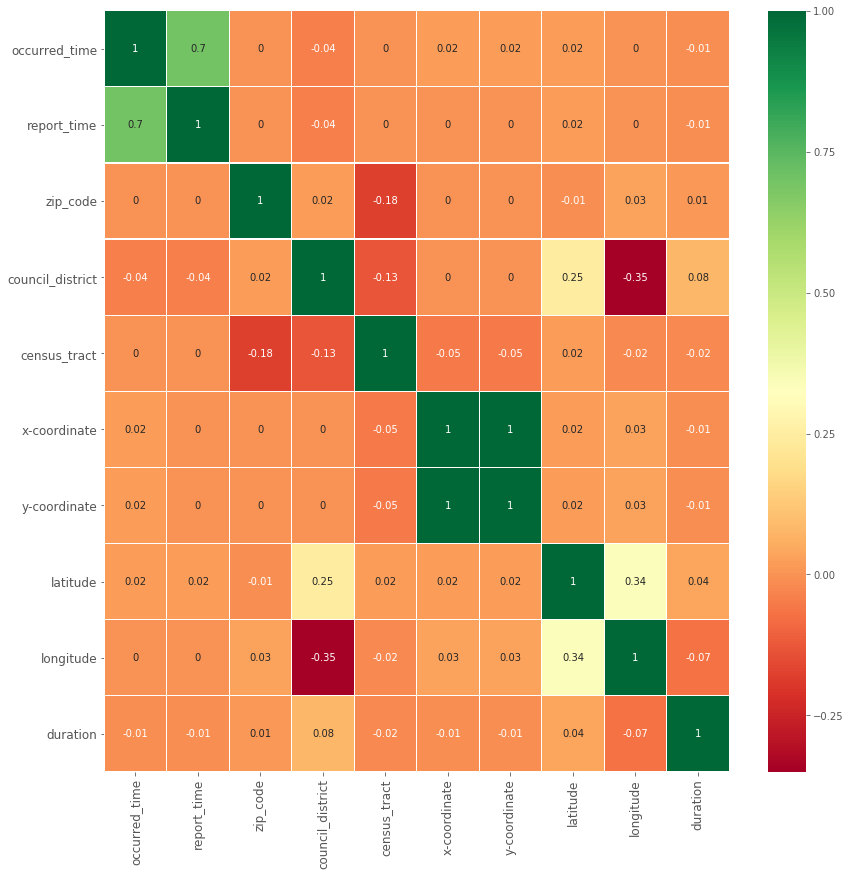

In [26]:
# Now we will make a HeatMap by using Seaborn Library
fig=sns.heatmap(df_numeric.corr().round(2),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
# Seaborn Heatmap cuts the top and bottom rows to half,to fix the error, y_lims are changed
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)
fig=plt.gcf()
fig.set_size_inches(14,14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [27]:
#It looks like there is a perfect correlation between X and y-corrdinate which might be erroneous
print(df['x-coordinate'].describe())
print(df['y-coordinate'].describe())
df['diff'] = df['x-coordinate'] - df['y-coordinate']
print(df['diff'].describe())

count    2.245946e+06
mean     3.077864e+06
std      3.633839e+05
min     -3.262185e+07
25%      3.108729e+06
50%      3.117210e+06
75%      3.126403e+06
max      3.889524e+07
Name: x-coordinate, dtype: float64
count    2.245946e+06
mean     3.077864e+06
std      3.633839e+05
min     -3.262185e+07
25%      3.108729e+06
50%      3.117210e+06
75%      3.126403e+06
max      3.889524e+07
Name: y-coordinate, dtype: float64
count    2245946.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: diff, dtype: float64


In [28]:
# It is clear that those two columns are exactly the same, which is erroneous. We will remove those two columns from the dataframe
df = df.drop(columns = ['y-coordinate','diff'])

In [29]:
df['x_coordinate_isnull'] = df['x-coordinate'].isnull().astype(int)
df['x-coordinate'] = df.groupby('zip_code')['x-coordinate'].transform(lambda ct: ct.fillna(ct.max()))

In [30]:
df['x-coordinate'].describe()

count    2.255740e+06
mean     3.233266e+06
std      2.381888e+06
min     -3.262185e+07
25%      3.108794e+06
50%      3.117292e+06
75%      3.126591e+06
max      3.889524e+07
Name: x-coordinate, dtype: float64

Now the data is cleaned, however, we need to add some features to our data frame

In [31]:
# Let's check the total missing values once again
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_df = pd.concat([missing_values,df[missing_values.index].dtypes], axis=1, keys=['Total','Data Types'],sort=False)
missing_df[missing_df['Total']>=1]

,Total,Data Types


Now, we have no missing values. I would like to add some additional features that might be helpful in our analysis.

In [32]:
# We will extract date time subgroups from occured_date_time
# Convert occurred_time to datetypes
df['occurred_date_time'] = pd.to_datetime(df['occurred_date_time'], errors='coerce')

# Extract year, month, day, hour and weekday from occured_time
df['year']=df['occurred_date_time'].dt.year
df['month']=df['occurred_date_time'].dt.strftime('%b')
df['day']=df['occurred_date_time'].dt.day
df['hour']=df['occurred_date_time'].dt.hour
df['weekday']=df['occurred_date_time'].dt.strftime('%a')

In [33]:
df['distance'] = np.sqrt(np.square(df['longitude']-df['longitude'].mean()) + np.square(df['latitude'] - df['latitude'].mean()))

In [34]:
# The data is cleaned and we would like to get our first train and test scores before getting our dummy variables:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

target_name = ['duration']
feature_names = [c for c in df.columns if df[c].dtype != 'object' and c not in target_name and df[c].dtype != 'datetime64[ns]']

In [35]:
# We will use X and y for the feature and target variables
X = df[feature_names]
y = df[target_name]

In [36]:
# Split the data to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

lr.fit(X_train, y_train)

# We will check the model's strength on training and testing set and see the percent change
print("linear regression score for training set:{}".format(lr.score(X_train,y_train)))
print("linear regression score for testing set:{}".format(lr.score(X_test,y_test)))

linear regression score for training set:0.2894025363164324
linear regression score for testing set:0.28721423254151335


Since the linear regression model works for the model, it means the data is ready for machine learning models.

## B. Exploratory Data Analysis

### 1. Crime Data vs Location

One of the first questions we may consider is the locations of the crime. To visualize the crimes, we want to make a scatter plot to see the crime map:

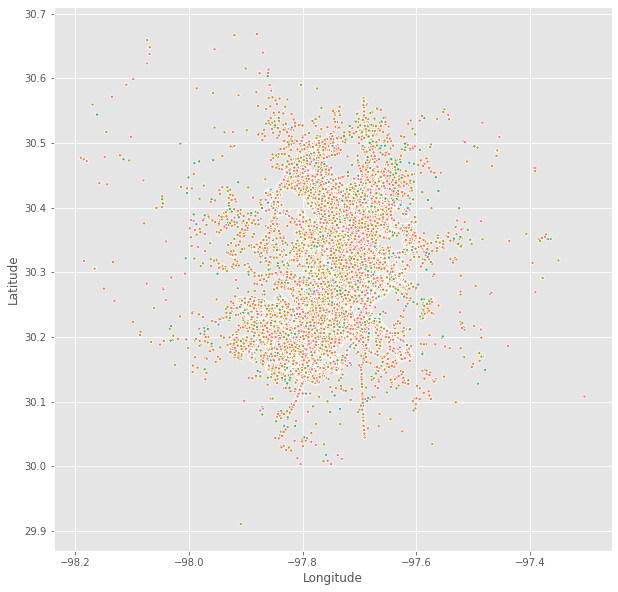

In [37]:
# Let'scheck the crime data on a map
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude',hue='highest_offense_description', data=df, s=10, legend = False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


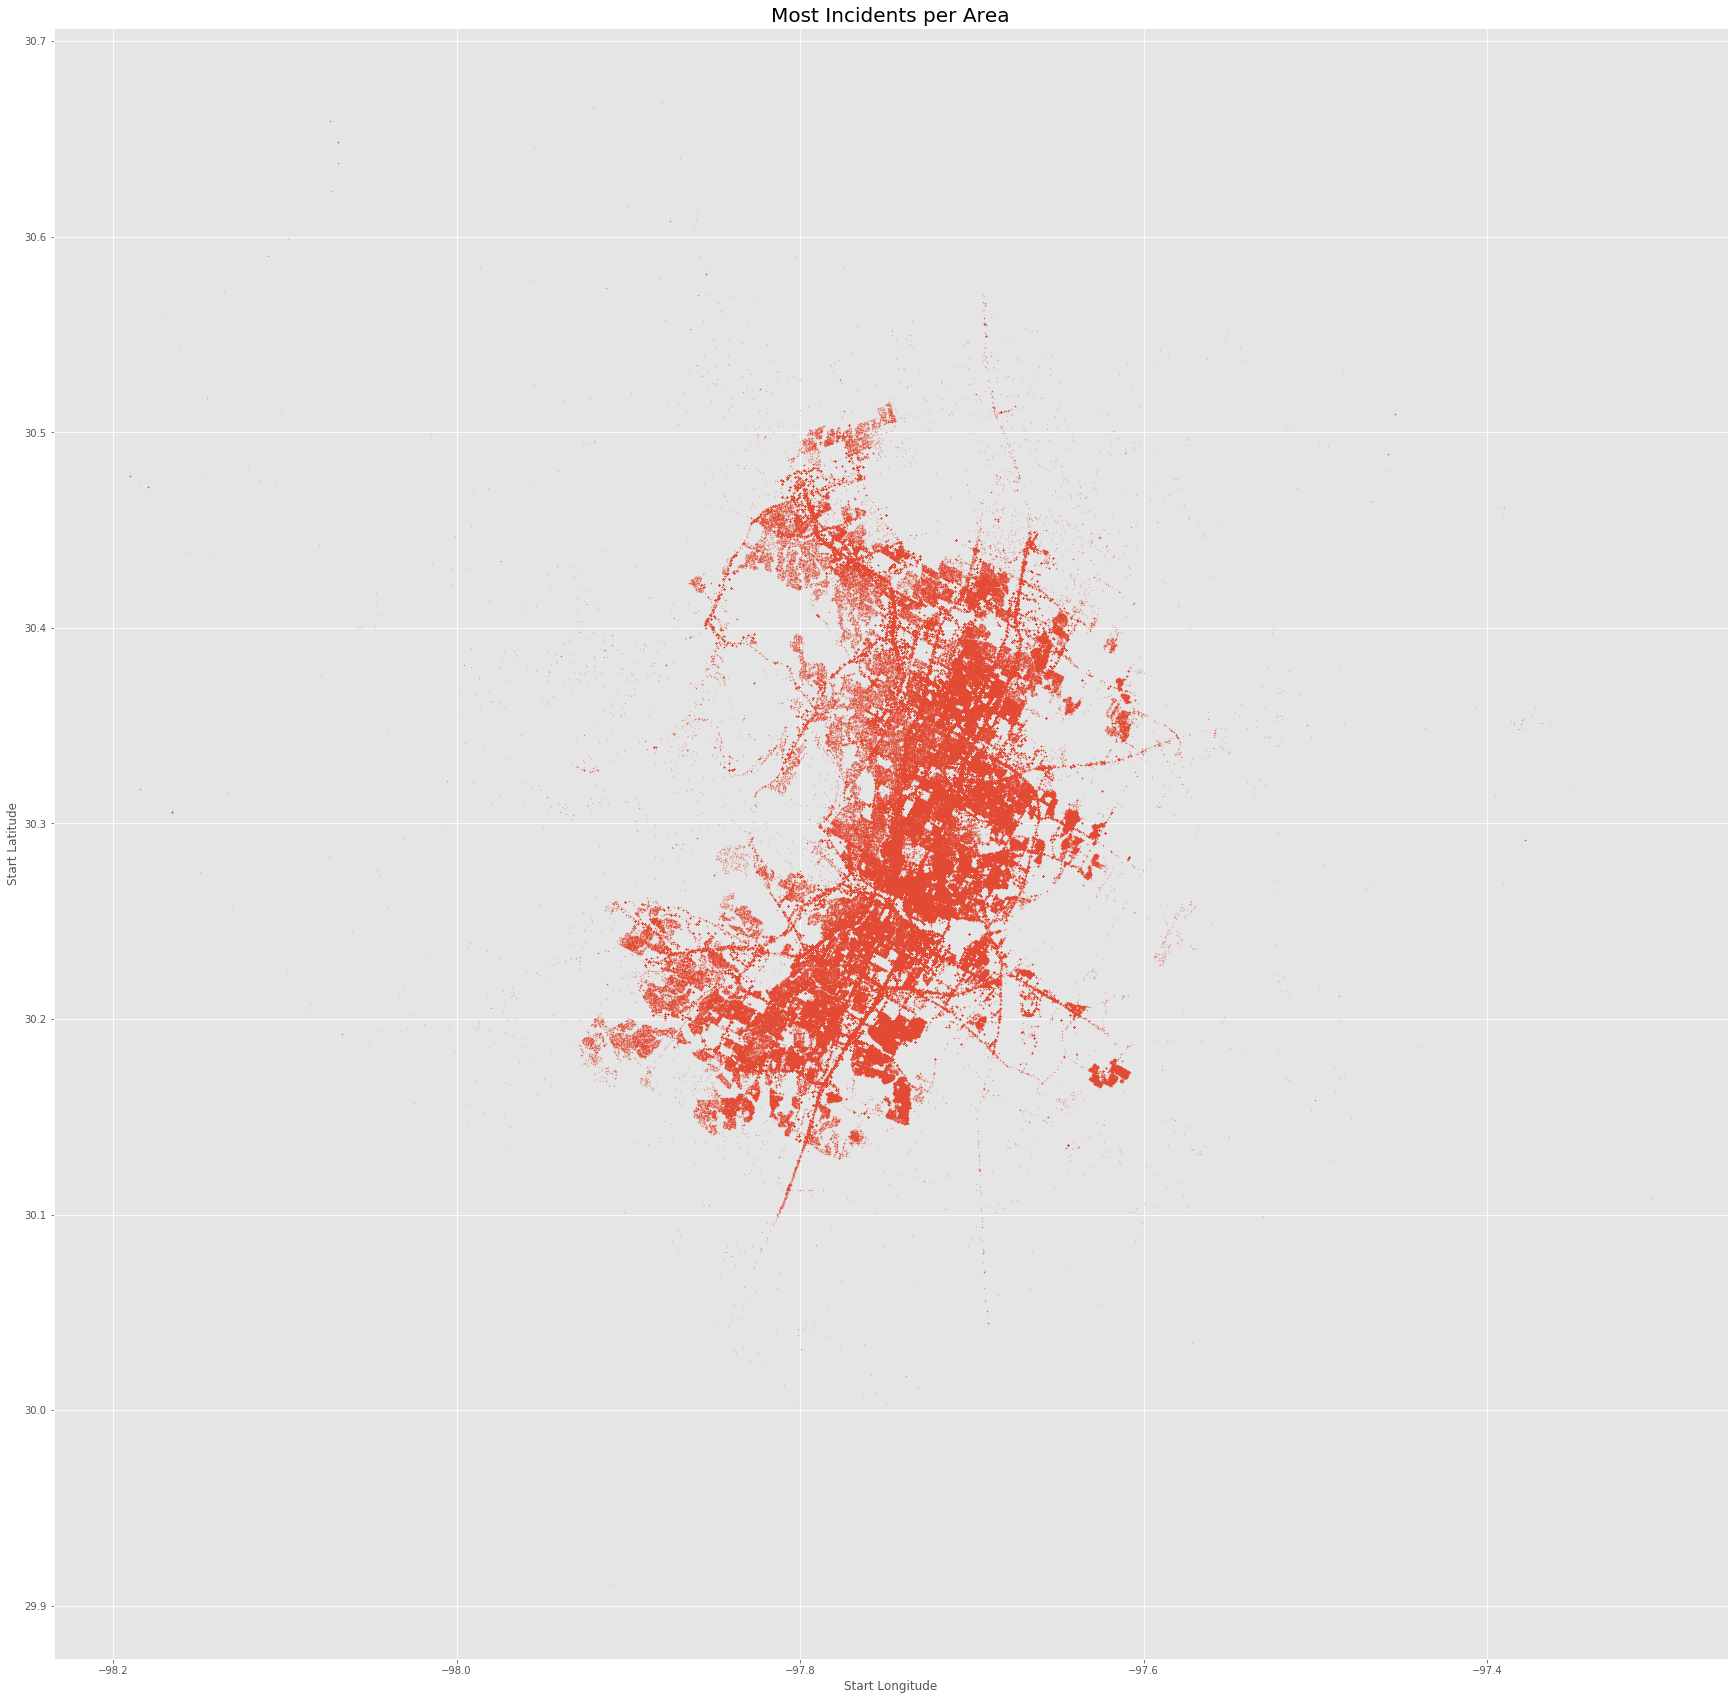

In [38]:
# We can also check the frequency of incidences per area
plt.figure(figsize=(30,30))
plt.title('Most Incidents per Area', fontsize=20)
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.plot(df.longitude, df.latitude, ".", alpha=0.5, ms=0.5)
plt.show()

We can observe that the incident map is pretty similar to the city's map. We can observe tere are some outliers of the map such as there are more crimes on the highways and there is a cluster which is located in city's airport

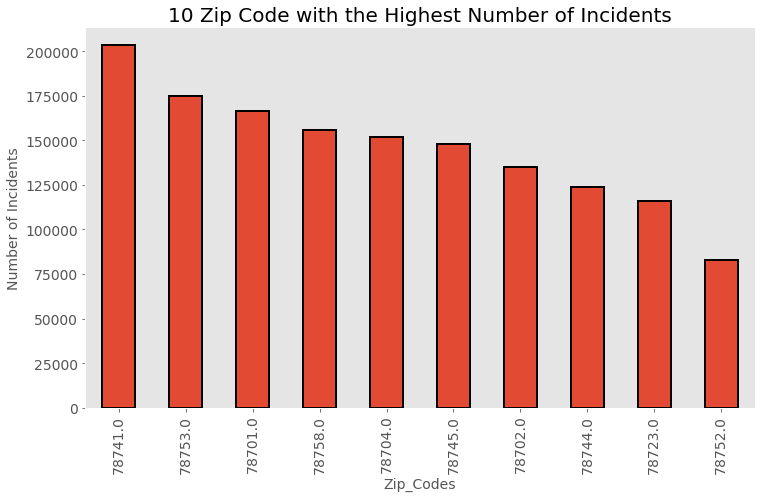

In [39]:
# Now, we will plot a bar plot to visualize to see which zip_codes have the highest number of accidents
top_ten_zip_codes = df['zip_code'].value_counts().head(10)
fig, ax=plt.subplots(figsize=(12,7))
top_ten_zip_codes.plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Zip_Codes',fontsize=14)
plt.ylabel('Number of Incidents',fontsize=14)
ax.tick_params(labelsize=14)
plt.title('10 Zip Code with the Highest Number of Incidents',fontsize=20)
plt.grid()

At data cleaning part, we made a dummy zip_code that does not exist in real life or in the data set: 78000. Let's check whether the incidents are randomly distributed:

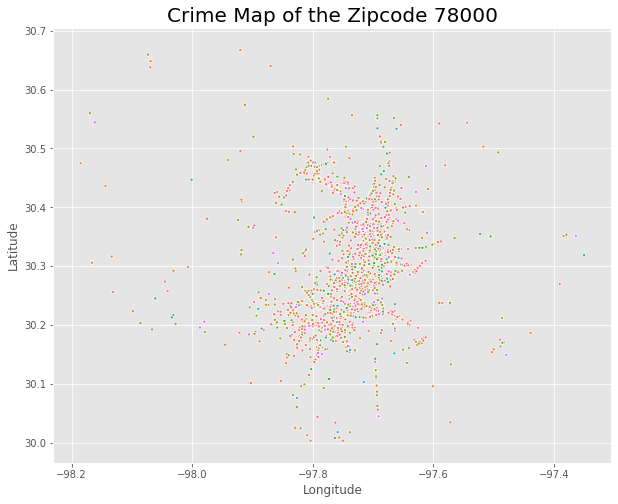

In [40]:
# We can check one zip code: 78000, our dummy zip_code's map
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude',hue='highest_offense_description', data=df.loc[df['zip_code']==78000], s=10, legend = False)
plt.title('Crime Map of the Zipcode 78000', fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Text(0.5, 1.0, 'Top 10 Zip Codes with Highest Mean Durations')

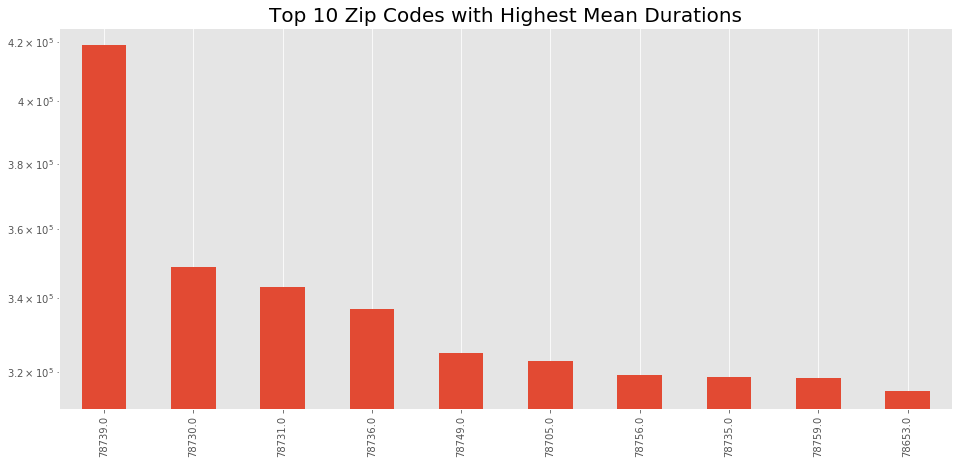

In [41]:
# Sort the zip_codes according to the amount of accidents
zip_vals = df['zip_code'].value_counts()
# Choose the zip_codes with more than 100 accidents
big_zips = zip_vals.index.values[zip_vals>1000]
df_zip_codes = df.groupby('zip_code').agg({'duration': 'mean'})

# Create a dictionary with city as a key and mean severity as values
zip_durations ={}
for zips, row in df_zip_codes.iterrows():
    if zips in big_zips:
        zip_durations[zips] = row['duration'] 
        
# Convert the dictionary to Pandas Series
x = pd.Series(zip_durations)

#Plot the graph. We will use logyscale since the mean values are preety close to each other
fig, ax=plt.subplots(figsize=(16,7))
x.sort_values(ascending = False).head(10).plot(kind = 'bar', logy=True)
plt.title("Top 10 Zip Codes with Highest Mean Durations", fontsize=20)

### 2. Incident Type

We can also observe how the incident types are associated with the incident numbers

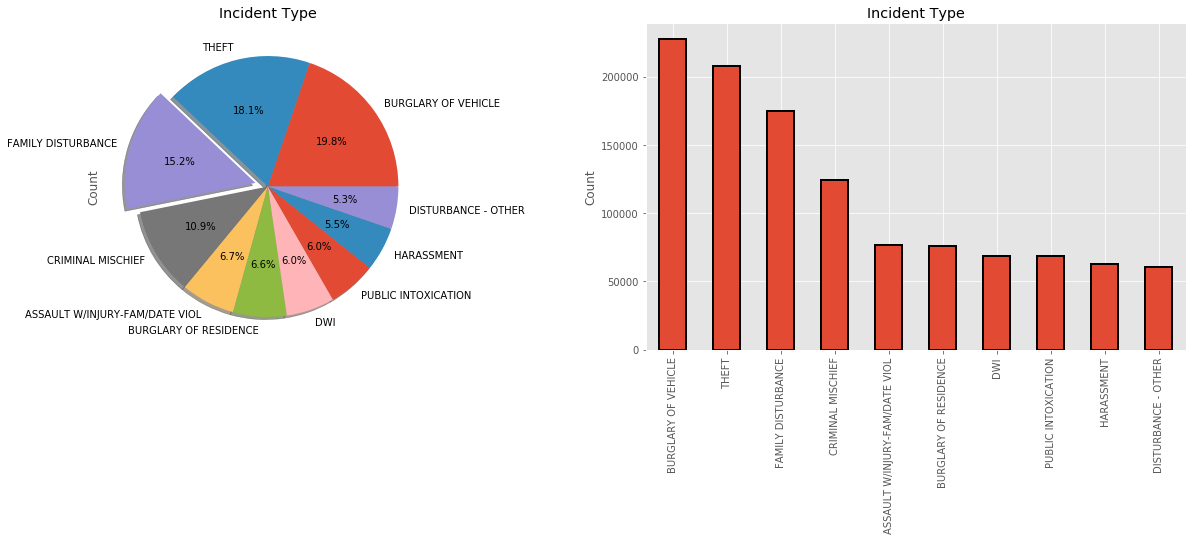

In [42]:
# Top 10 Incident Types
f,ax=plt.subplots(1,2,figsize=(12,6))
df_top_weather_conditions = df.groupby('highest_offense_description').size().sort_values(ascending=False).iloc[:10]
df_top_weather_conditions.plot.pie(explode=[0,0,0.1,0,0,0,0,0,0,0],ax=ax[0],autopct='%1.1f%%',shadow=True)
ax[0].set_title('Incident Type')
ax[0].set_ylabel('Count')
df['highest_offense_description'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,ax=ax[1],edgecolor='k',align='center',linewidth=2)
ax[1].set_title('Incident Type')
ax[1].set_ylabel('Count')
plt.subplots_adjust(left=None, bottom=None, right=1.5, top=None, wspace=None, hspace=None)
plt.show()

Text(0.5, 1.0, 'Top 10 Offenses with Highest Mean Durations')

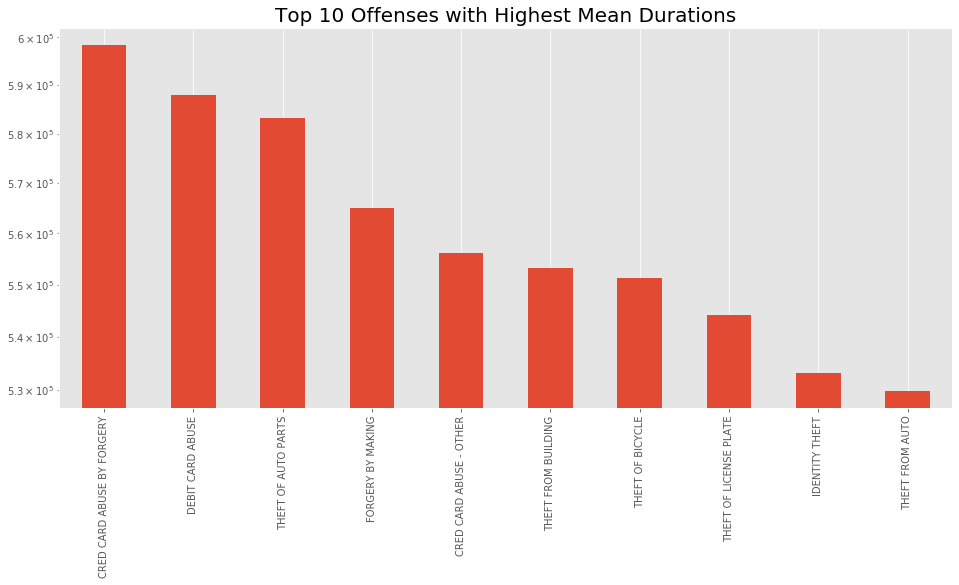

In [43]:
# Sort the incidents according to the mean durations
high_offense = df['highest_offense_description'].value_counts()
# Choose the zip_codes with more than 100 incidents
big_offense = high_offense.index.values[high_offense>1000]
df_high_offense = df.groupby('highest_offense_description').agg({'duration': 'mean'})

# Create a dictionary with city as a key and mean severity as values
offense_durations ={}
for offenses, row in df_high_offense.iterrows():
    if offenses in big_offense:
        offense_durations[offenses] = row['duration'] 
        
# Convert the dictionary to Pandas Series
x = pd.Series(offense_durations)

#Plot the graph. We will use logyscale since the mean values are preety close to each other
fig, ax=plt.subplots(figsize=(16,7))
x.sort_values(ascending = False).head(10).plot(kind = 'bar', logy=True)
plt.title("Top 10 Offenses with Highest Mean Durations", fontsize=20)

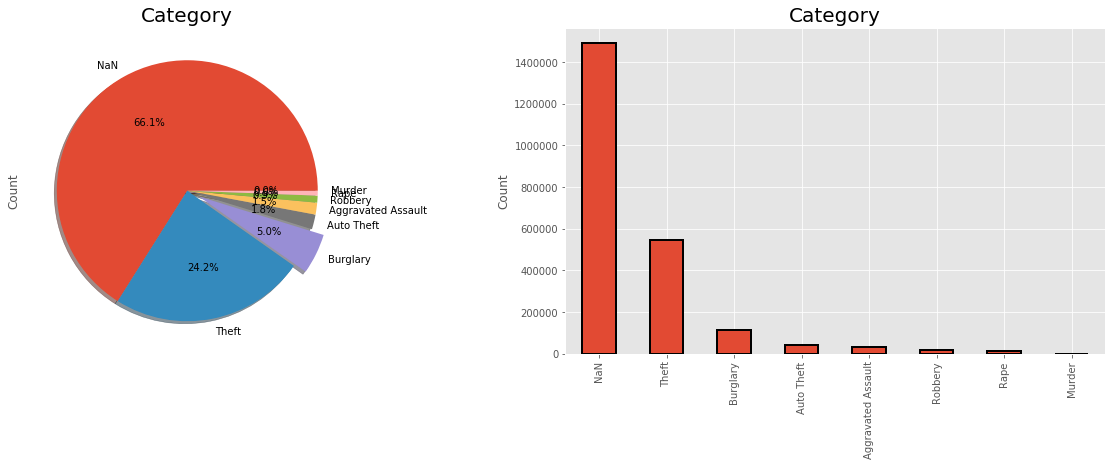

In [44]:
# Graph of Category Descriptions
f,ax=plt.subplots(1,2,figsize=(12,6))
df.category_description.value_counts().plot.pie(explode=[0,0,0.1,0,0,0,0,0],ax=ax[0],autopct='%1.1f%%',shadow=True)
ax[0].set_title('Category', fontsize=20)
ax[0].set_ylabel('Count')
df.category_description.value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,ax=ax[1],edgecolor='k',align='center',linewidth=2)
ax[1].set_title('Category', fontsize=20)
ax[1].set_ylabel('Count')
plt.subplots_adjust(left=None, bottom=None, right=1.5, top=None, wspace=None, hspace=None)
plt.show()

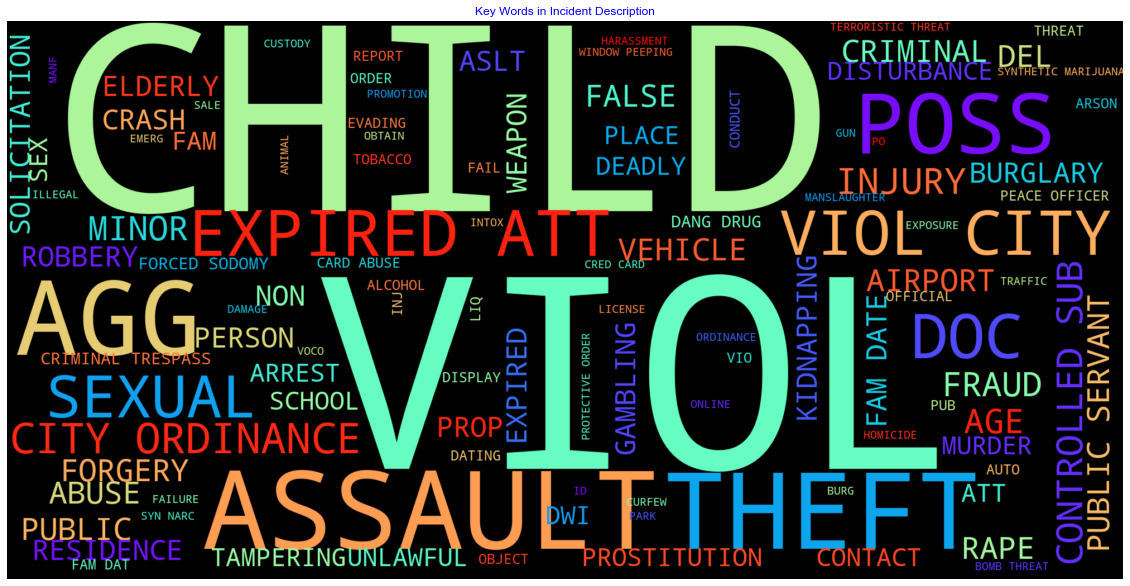

In [45]:
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = df["highest_offense_description"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(wrds1))
plt.figure(figsize=(20,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Incident Description",color='b')
plt.show()

## 3. Incident vs. Time

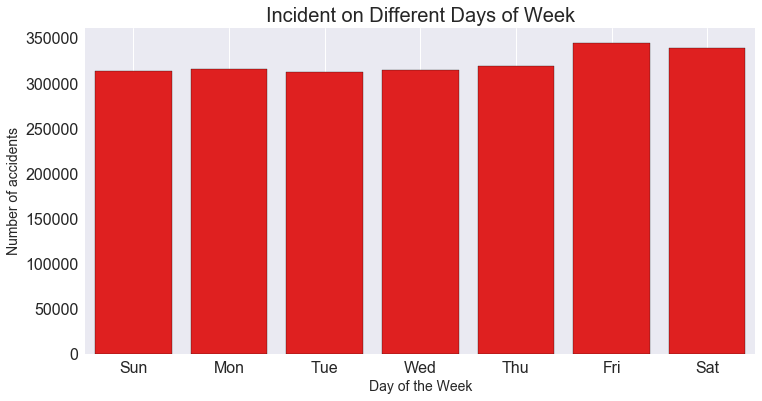

In [46]:
# We can check the incident distribution over the days of the week
fig, ax=plt.subplots(figsize=(12,6))
order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
sns.barplot(df['weekday'].value_counts().index, df['weekday'].value_counts(),edgecolor='k', color='r', order=order)
plt.xlabel('Day of the Week',fontsize=14)
plt.ylabel('Number of accidents',fontsize=14)
ax.tick_params(labelsize=16)
plt.title('Incident on Different Days of Week',fontsize=20)
plt.grid()
plt.show()

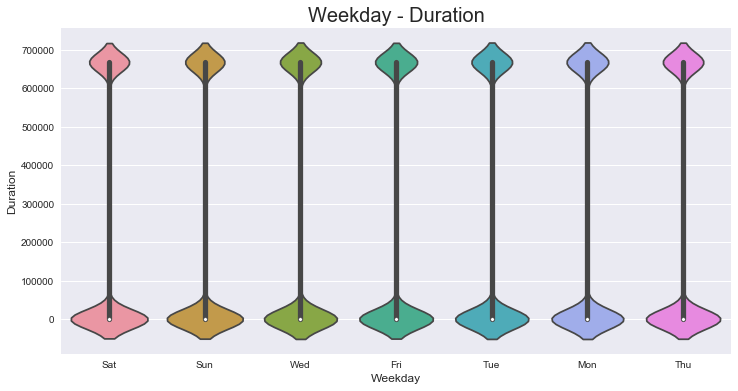

In [47]:
# Sketch a Violin Plot for Days vs. Duration
plt.figure(figsize=(12,6))
sns.violinplot(x='weekday', y='duration', data=df)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.title("Weekday - Duration",fontsize=20)
plt.show()

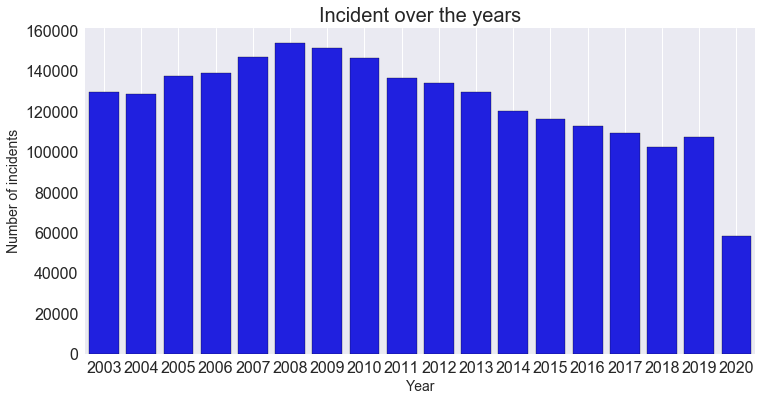

In [48]:
# Incidents over the years

fig, ax=plt.subplots(figsize=(12,6))
sns.barplot(df['year'].value_counts().index, df['year'].value_counts(),edgecolor='k', color='b')
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of incidents',fontsize=14)
ax.tick_params(labelsize=16)
plt.title('Incident over the years',fontsize=20)
plt.grid()
plt.show()

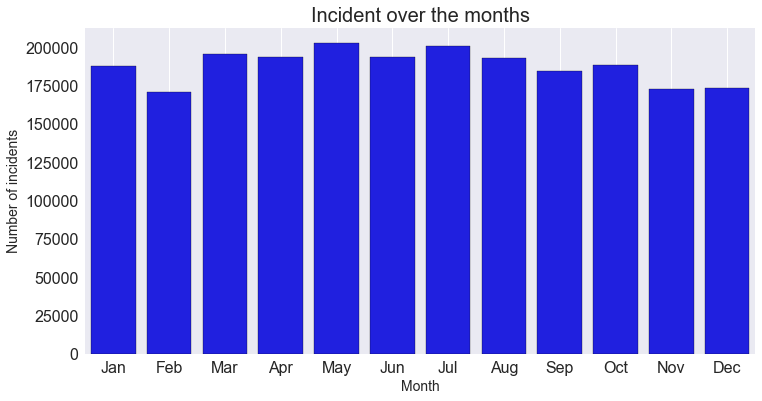

In [49]:
fig, ax=plt.subplots(figsize=(12,6))
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.barplot(df['month'].value_counts().index, df['month'].value_counts(),edgecolor='k', color='b', order=months)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of incidents',fontsize=14)
ax.tick_params(labelsize=16)
plt.title('Incident over the months',fontsize=20)
plt.grid()
plt.show()

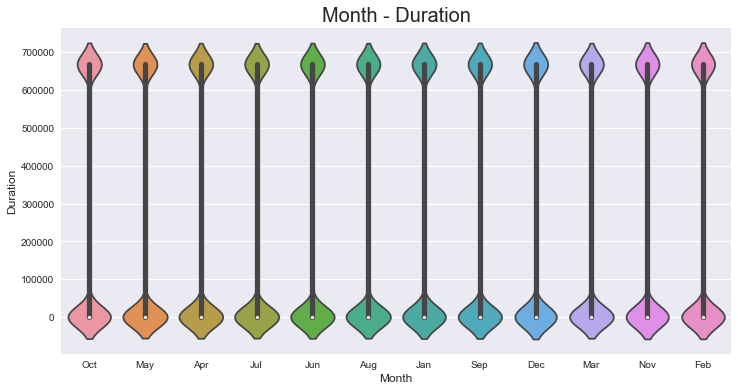

In [50]:
# Sketch a Violin Plot for Family Violence vs. Duration
plt.figure(figsize=(12,6))
sns.violinplot(x='month', y='duration', data=df)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.title("Month - Duration",fontsize=20)
plt.show()

Text(0, 0.5, 'Number of Accidents')

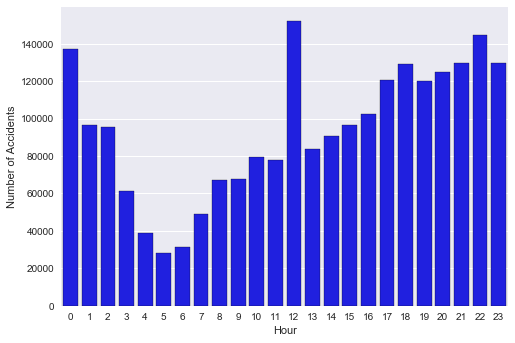

In [51]:
sns.barplot(df['hour'].value_counts().index, df['hour'].value_counts(),edgecolor='k', color='b')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')

## 4. Incident vs. Location Type

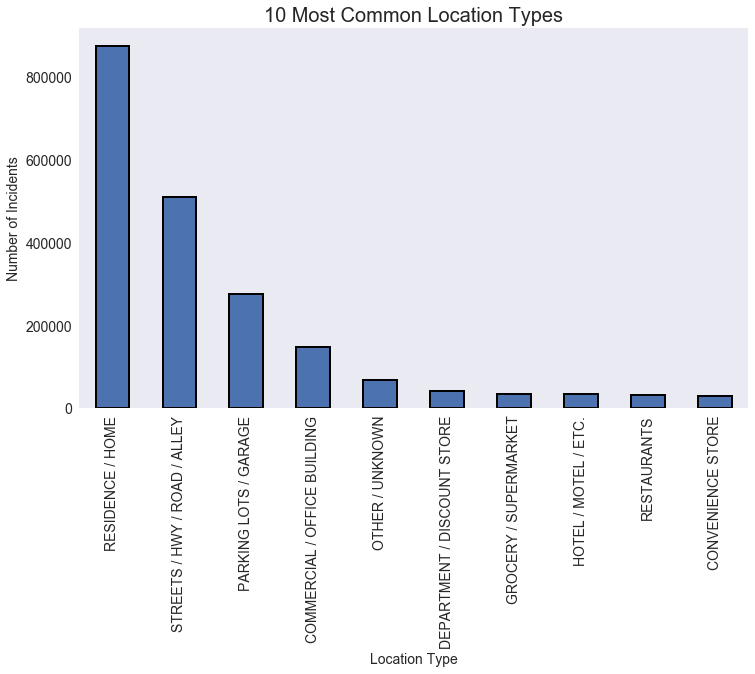

In [52]:
# Now, we will plot a bar plot to visualize to see the most common violence
top_ten_zip_codes = df['location_type'].value_counts().head(10)
fig, ax=plt.subplots(figsize=(12,7))
top_ten_zip_codes.plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Location Type',fontsize=14)
plt.ylabel('Number of Incidents',fontsize=14)
ax.tick_params(labelsize=14)
plt.title('10 Most Common Location Types',fontsize=20)
plt.grid()

## 5. Family Disturbance

In [53]:
df['family_violence'].value_counts()

N    2124678
Y     131062
Name: family_violence, dtype: int64

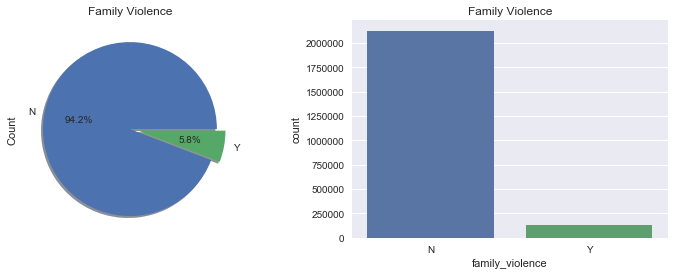

In [54]:
# Percent of Side Types
f,ax=plt.subplots(1,2,figsize=(9,4))
df['family_violence'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Family Violence')
ax[0].set_ylabel('Count')
sns.countplot('family_violence',data=df,ax=ax[1],order=df['family_violence'].value_counts().index)
ax[1].set_title('Family Violence')
plt.subplots_adjust(left=None, bottom=None, right=1.2, top=None, wspace=None, hspace=None)
plt.show()

### Get Dummies

In [55]:
#Let's get the dummies for the data
df = pd.get_dummies(df, columns = ['location_type'], drop_first = False)
df = pd.get_dummies(df, columns = [ 'family_violence'], drop_first = False)
df = pd.get_dummies(df, columns = [ 'clearance_status'], drop_first = False)
df = pd.get_dummies(df, columns = ['apd_sector'], drop_first = False)
df = pd.get_dummies(df, columns = ['apd_district'], drop_first = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2255740 entries, 0 to 2255904
Columns: 232 entries, incident_number to apd_district_S10
dtypes: datetime64[ns](1), float64(10), int32(17), int64(5), object(12), uint8(187)
memory usage: 1.0+ GB


In [56]:
# Let's save the wrangled data with the dummies
df.to_csv('Crime_Data_with_dummies.csv')

## C. Machine Learning

In [57]:
# Import required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Since we have so many columns in the dataframe, we need to change the Pandas settings to observe the data frame more efficiently:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 20
pd.options.display.min_rows = 20

In [58]:
# Upload the csv file into pandas
# For efficiency and speed, we will choose a sample of 20000
df = pd.read_csv(r'C:\Users\Servet\Desktop\Jupyter_Notebooks\Crime_Data_with_dummies.csv',index_col=False).sample(20000)
# Check how the data looks like
df.head()

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,incident_number,highest_offense_description,highest_offense_code,occurred_date_time,occurred_date,occurred_time,report_date_time,report_date,report_time,address,zip_code,council_district,pra,census_tract,clearance_date,ucr_category,category_description,x-coordinate,latitude,longitude,location,duration,duration_is_negative,address_isnull,apd_sector_isnull,apd_district_isnull,location_type_isnull,location_isnull,clearance_date_isnull,clearance_status_isnull,ucr_category_isnull,category_description_isnull,pra_isnull,zip_code_isnull,longitude_isnull,latitude_isnull,census_tract_isnull,council_district_isnull,x_coordinate_isnull,year,month,day,hour,weekday,distance,location_type_ABANDONED/CONDEMNED STRUCTURE,location_type_AMUSEMENT PARK,location_type_ARENA / STADIUM / FAIRGROUNDS / COLISEUM,location_type_ATM SEPARATE FROM BANK,location_type_AUTO DEALERSHIP NEW / USED,location_type_BANKS / SAVINGS & LOAN,location_type_BAR / NIGHT CLUB,location_type_CAMP / CAMPGROUND,location_type_CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,location_type_COMMERCIAL / OFFICE BUILDING,location_type_COMMUNITY CENTER,location_type_CONSTRUCTION SITE,location_type_CONVENIENCE STORE,location_type_CYBERSPACE,location_type_DAYCARE FACILITY,location_type_DEPARTMENT / DISCOUNT STORE,location_type_DOCK / WHARF / FREIGHT / MODAL TERMINAL,location_type_DRUG STORE / DR. OFFICE / HOSPITAL,location_type_FARM FACILITY,location_type_FIELD / WOODS,location_type_GAMBLING FACILITY / CASINO / RACE TRACK,location_type_GAS / SERVICE STATIONS,location_type_GOVERNMENT / PUBLIC BUILDING,location_type_GROCERY / SUPERMARKET,location_type_HOTEL / MOTEL / ETC.,location_type_INDUSTRIAL SITE,location_type_JAIL / PRISON,location_type_LAKE / WATERWAY,location_type_LIQUOR STORE,location_type_MILITARY INSTALLATION,location_type_NaN,location_type_OTHER / UNKNOWN,location_type_PARK / PLAYGROUND,location_type_PARKING LOTS / GARAGE,location_type_RENTAL STORAGE FACILITY,location_type_RESIDENCE / HOME,location_type_REST AREA,location_type_RESTAURANTS,location_type_SCHOOL - COLLEGE / UNIVERSITY,location_type_SCHOOL - ELEMENTARY / SECONDARY,location_type_SCHOOLS / COLLEGES,location_type_SHELTER-MISSION / HOMELESS,location_type_SHOPPING MALL,location_type_SPECIALTY STORE (TV FUR ETC.),location_type_STREETS / HWY / ROAD / ALLEY,location_type_TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),location_type_TRIBAL LANDS,family_violence_N,family_violence_Y,clearance_status_9,clearance_status_C,clearance_status_N,clearance_status_NaN,clearance_status_O,apd_sector_.,apd_sector_1,apd_sector_1124,apd_sector_2,apd_sector_21,apd_sector_4,apd_sector_44,apd_sector_6,apd_sector_8,apd_sector_83,apd_sector_88,apd_sector_95,apd_sector_99,apd_sector_A,apd_sector_A1,apd_sector_A2,apd_sector_AD,apd_sector_ADAM,apd_sector_AP,apd_sector_AS,apd_sector_AV,apd_sector_B,apd_sector_BA,apd_sector_BAKR,apd_sector_C,apd_sector_C1,apd_sector_CE,apd_sector_CH,apd_sector_CHAR,apd_sector_D,apd_sector_D6,apd_sector_D8,apd_sector_DA,apd_sector_DAVD,apd_sector_DR,apd_sector_E,apd_sector_E1,apd_sector_E4,apd_sector_ED,apd_sector_F,apd_sector_F6,apd_sector_F7,apd_sector_FR,apd_sector_G,apd_sector_GE,apd_sector_GR,apd_sector_GRGE,apd_sector_H,apd_sector_HE,apd_sector_HENRY,apd_sector_HR,apd_sector_I,apd_sector_ID,apd_sector_IDA,apd_sector_NaN,apd_sector_RD,apd_sector_SC,apd_sector_UT,apd_sector_WM,apd_district_0,apd_district_01,apd_district_02,apd_district_03,apd_district_04,apd_district_05,apd_district_06,apd_district_07,apd_district_08,apd_district_09,apd_district_1,apd_district_10,apd_district_11,apd_district_12,apd_district_17,apd_district_2,apd_district_3,apd_district_4,apd_district_493,apd_district_5,apd_district_6,apd_district_7,apd_district_8,apd_district_83,apd_district_88,apd_district_9,apd_district_999,apd_district_A,apd_district_A1,apd_district_A2,apd_district_A4,apd_district_A5,apd_district_A6,apd_district_A7,apd_district_ADAM3,apd_district_ADM,apd_district_B,apd_district_B1,apd_district_B4,apd_district_B5,apd_district_B

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 927973 to 15743
Columns: 233 entries, Unnamed: 0 to apd_district_S10
dtypes: float64(10), int64(210), object(13)
memory usage: 35.7+ MB


## 1. Regression Models

When we define "duration" as our target variable, which is a continuous variable, we may consider the models as a regression problem. We will start with a linear regression model.

### a. Linear Regression

We will choose feature variables as non-object and not datetime variables

In [60]:
# We will define target and feature names 
target_name = ['duration']
feature_names = [c for c in df.columns if df[c].dtype != 'object' and c not in target_name and df[c].dtype != 'datetime64[ns]']

# We will use X and y for the feature and target variables
X = df[feature_names]
y = df[target_name]

In [61]:
# Let's check how many features we will initially use
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 927973 to 15743
Columns: 219 entries, Unnamed: 0 to apd_district_S10
dtypes: float64(9), int64(210)
memory usage: 33.6 MB


In [62]:
# Split the data to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)


# Import Cross-Validation from scikitlearn
from sklearn.model_selection import cross_val_score

# Import Linear Regression library and MSE
from sklearn.linear_model import LinearRegression


# Instantiate a linear regression
lr = LinearRegression()

We have 211 features and this may cause curse of dimensionality and may reduce both train and test score for our models.

In [63]:
lr.fit(X_train, y_train)

# We will check the model's strength on training and testing set and see the percent change
print("linear regression score for training set:{}".format(lr.score(X_train,y_train)))
print("linear regression score for testing set:{}".format(lr.score(X_test,y_test)))

linear regression score for training set:0.3513963130212926
linear regression score for testing set:0.353106615894226


There might be an overfitting problem since there is a significant difference between train and test scores. We will cross-validate the score to see how the overfitting may be a problem or not.

In [64]:
# Cross-Validate the model
cv_lr_train_score = cross_val_score(lr,X_train,y_train,cv=5)
print(cv_lr_train_score)

cv_lr_test_score = cross_val_score(lr,X_test,y_test,cv=5)

#We would like to display as a Data Frame
pd.DataFrame(dict(train_scores=cv_lr_train_score, test_scores=cv_lr_test_score))

[0.2490515  0.31287356 0.35006427 0.35534684 0.35485208]


,train_scores,test_scores
0,0.249052,0.334079
1,0.312874,0.360456
2,0.350064,0.308664
3,0.355347,0.341031
4,0.354852,0.313656


### A. Scaling the Feature Variables

In [65]:
# We create an empty Scaled scores
# We will firstly include our unscaled scores as a dictionary in our list
hyper_param_list_scaler = [dict(scaler="unscaled", train_score=lr.score(X_train,y_train), test_score=lr.score(X_test,y_test))]

In [66]:
# Import all scalers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [67]:
# We will do a hyperparameter tuning to see which scaler will result the best test score
scalers = [MinMaxScaler(), MaxAbsScaler(), StandardScaler(), RobustScaler(), Normalizer(), QuantileTransformer()]
for scaler in scalers:
    Xs_train = scaler.fit_transform(X_train)
    Xs_test = scaler.transform(X_test)
    lr.fit(Xs_train, y_train)
    train_score = lr.score(Xs_train, y_train)
    test_score = lr.score(Xs_test, y_test)
    hyper_params = dict(scaler=scaler, train_score=train_score, test_score=test_score)
    hyper_param_list_scaler.append(hyper_params)

In [68]:
df_hyper_param_scaler = pd.DataFrame(hyper_param_list_scaler)
df_hyper_param_scaler.round(4).sort_values('test_score')

,scaler,train_score,test_score
1,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.3475,-2.390311e+20
3,"StandardScaler(copy=True, with_mean=True, with...",0.3514,-1.922441e+19
6,"QuantileTransformer(copy=True, ignore_implicit...",0.3360,-7.938403e+17
2,MaxAbsScaler(copy=True),0.3514,-1.252331e+17
5,"Normalizer(copy=True, norm='l2')",0.0384,2.360000e-02
0,unscaled,0.3514,3.531000e-01
4,"RobustScaler(copy=True, quantile_range=(25.0, ...",0.3514,3.532000e-01


There is not a big difference between scaled and robust, but just to get a new feature variables, we will defined 'Xs'scaled x with robust

In [69]:
robust_scaler_hyper_params = []

In [70]:
# We will perform a hyperparameter tuning with Robust Scaler with quantile range:
quantile_range = [(0.05,0.95),(0.15,0.85),(0.25,0.75),(0.35,0.65),(0.45,0.55)]
for quantile in quantile_range:
    scaler = RobustScaler(quantile_range=quantile)
    Xs_train = scaler.fit_transform(X_train)
    Xs_test = scaler.transform(X_test)
    lr.fit(Xs_train, y_train)
    train_score = lr.score(Xs_train, y_train)
    test_score = lr.score(Xs_test, y_test)
    hyper_params = dict(quantile=quantile, train_score=train_score, test_score=test_score)
    robust_scaler_hyper_params.append(hyper_params)

In [71]:
df_robust_scaler_hyper_params = pd.DataFrame(robust_scaler_hyper_params)
df_robust_scaler_hyper_params.round(4).sort_values('test_score')

,quantile,train_score,test_score
0,"(0.05, 0.95)",0.3514,0.3532
1,"(0.15, 0.85)",0.3514,0.3532
2,"(0.25, 0.75)",0.3514,0.3532
3,"(0.35, 0.65)",0.3514,0.3532
4,"(0.45, 0.55)",0.3514,0.3532


In [72]:
# We do not see a difference between these hyperparameters
Xs = RobustScaler().fit_transform(X)
Xs_train, Xs_test, y_train, y_test = train_test_split( Xs, y, test_size=0.20, random_state=42)

### Ridge Regression

In [73]:
# We create an empty hyper-parameter list for tuning
hyper_param_list_ridge = []

In [74]:
from sklearn.linear_model import Ridge
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    train_score = ridge.score(X_train, y_train)
    test_score = ridge.score(X_test, y_test)
    ridge.score(X_test, y_test)
    hyper_params = dict(alpha=alpha, train_score=train_score, test_score=test_score)
    hyper_param_list_ridge.append(hyper_params)

In [75]:
df_hyper_param_ridge = pd.DataFrame(hyper_param_list_ridge)
df_hyper_param_ridge.round(4).sort_values('test_score')

,alpha,train_score,test_score
8,10000.0000,0.0002,-0.0002
7,1000.0000,0.0015,0.0013
6,100.0000,0.0148,0.0148
5,10.0000,0.1046,0.1065
4,1.0000,0.2488,0.2539
3,0.1000,0.2767,0.2833
2,0.0100,0.2820,0.2886
1,0.0010,0.3091,0.3149
0,0.0001,0.3473,0.3504


### Lasso Regression

In [76]:
hyper_param_list_lasso = []

In [77]:
from sklearn.linear_model import Lasso
alphas = [0, 0.0001, 0.001, 0.01, 0.1,1,10]
for alpha in alphas:
    lasso = Lasso(alpha=alpha, normalize=True, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    train_score = lasso.score(X_train, y_train)
    test_score = lasso.score(X_test, y_test)
    hyper_params = dict(alpha=alpha, train_score=train_score, test_score=test_score)
    hyper_param_list_lasso.append(hyper_params)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 532362057487634.7, tolerance: 164159345679.49054
  positive)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 528511340419274.5, toleranc

In [78]:
df_hyper_param_lasso = pd.DataFrame(hyper_param_list_lasso)
df_hyper_param_lasso.round(5).sort_values('test_score')

,alpha,train_score,test_score
6,10.0000,0.27621,0.28360
5,1.0000,0.35037,0.35289
0,0.0000,0.35141,0.35312
1,0.0001,0.35141,0.35312
2,0.0010,0.35141,0.35312
3,0.0100,0.35141,0.35315
4,0.1000,0.35139,0.35321


### ElasticNet Regression

In [79]:
hyper_param_list_elastic = []

In [80]:
from sklearn.linear_model import ElasticNet
alphas = [0.00000001,0.0000001, 0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1]
for alpha in alphas:
    elastic = ElasticNet(alpha=alpha, normalize=True, max_iter=10000)
    elastic.fit(X_train, y_train)
    elastic_pred = elastic.predict(X_test)
    train_score = elastic.score(X_train, y_train)
    test_score = elastic.score(X_test, y_test)
    hyper_params = dict(alpha=alpha, train_score=train_score, test_score=test_score)
    hyper_param_list_elastic.append(hyper_params)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 544428715397854.6, tolerance: 164159345679.49054
  positive)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 575036769224903.2, tolerance: 164159345679.49054
  positive)


In [81]:
df_hyper_param_elastic = pd.DataFrame(hyper_param_list_elastic)
df_hyper_param_elastic.round(7).sort_values('test_score')

,alpha,train_score,test_score
7,1.000000e-01,0.001923,0.001654
6,1.000000e-02,0.018276,0.018342
5,1.000000e-03,0.120729,0.122907
4,1.000000e-04,0.255236,0.260635
3,1.000000e-05,0.277155,0.283828
2,1.000000e-06,0.283060,0.289692
1,1.000000e-07,0.313866,0.319444
0,0.000000e+00,0.348482,0.351412


### D. Decision Trees

In [82]:
from sklearn.tree import DecisionTreeRegressor
# Import accuracy score from sckit learn
from sklearn.metrics import accuracy_score

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_regressor = DecisionTreeRegressor(max_depth=8, random_state=1)


# Fit dt_entropy to the training set
dt_regressor.fit(X_train, y_train)


print("Decision tree regressor score on the training data:{}".format(dt_regressor.score(X_train,y_train)))

print("Decision tree entropy score on the testing data:{}".format(dt_regressor.score(X_test,y_test)))

Decision tree regressor score on the training data:0.562667583862052
Decision tree entropy score on the testing data:0.5227850128448345


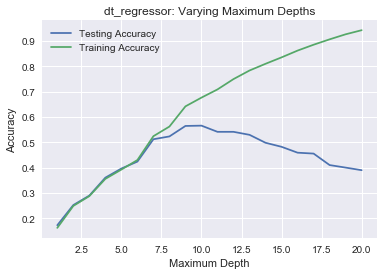

In [86]:
# Setup arrays to store train and test accuracies
depths = np.arange(1, 21)
train_accuracy = np.empty(len(depths))
test_accuracy = np.empty(len(depths))

# Loop over different values of k
for i, k in enumerate(depths):
    # Setup a Decison Tree with k nmax depths: dt_entropy
    dt_regressor= DecisionTreeRegressor(max_depth=k)

    # Fit the classifier to the training data
    dt_regressor.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = dt_regressor.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = dt_regressor.score(X_test, y_test)

# Generate plot
plt.title('dt_regressor: Varying Maximum Depths')
plt.plot(depths, test_accuracy, label = 'Testing Accuracy')
plt.plot(depths, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()

8 appears to be an optimal value for the max_depth.

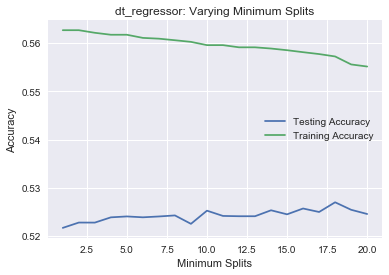

In [87]:
# Setup arrays to store train and test accuracies
splits = np.arange(2, 22)
train_accuracy = np.empty(len(splits))
test_accuracy = np.empty(len(splits))

# Loop over different values of k
for i, k in enumerate(splits):
    # Setup a Decison Tree with k nmax depths: dt_entropy
    dt_regressor = DecisionTreeRegressor(max_depth=8, min_samples_split=k)

    # Fit the classifier to the training data
    dt_regressor.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = dt_regressor.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = dt_regressor.score(X_test, y_test)

# Generate plot
plt.title('dt_regressor: Varying Minimum Splits')
plt.plot(depths, test_accuracy, label = 'Testing Accuracy')
plt.plot(depths, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Minimum Splits')
plt.ylabel('Accuracy')
plt.show()

In [95]:
hyper_param_list_dt = []

In [96]:
criterion = ['mse', 'friedman_mse', 'mae']
for i in criterion:
    dt_regressor = DecisionTreeRegressor(max_depth=8, min_samples_split=14, criterion=i)
    dt_regressor.fit(X_train, y_train)
    train_score = dt_regressor.score(X_train, y_train)
    test_score = dt_regressor.score(X_test, y_test)
    dt_regressor.score(X_test, y_test)
    hyper_params = dict(criterion=i, train_score=train_score, test_score=test_score)
    hyper_param_list_dt.append(hyper_params)

In [97]:
df_hyper_param_dt= pd.DataFrame(hyper_param_list_dt)
df_hyper_param_dt.round(5).sort_values('test_score')

,criterion,train_score,test_score
2,mae,0.12933,0.07064
1,friedman_mse,0.55912,0.52392
0,mse,0.55912,0.52409


In [99]:
# Now, we can set the hyperparameters as Mx_septh 8 and Min split 14 and criterion 
dt_regressor = DecisionTreeRegressor(max_depth=8, min_samples_split=14, criterion='mse')

## Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50,random_state=38)
rf.fit(X_train,y_train)

print("Random Forest Regressor score on the training data:{}".format(rf.score(X_train,y_train)))

print("Random Forest Regressor score on the testing data:{}".format(rf.score(X_test,y_test)))

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest Regressor score on the training data:0.9537247347093515
Random Forest Regressor score on the testing data:0.6932726749185245


In [101]:
hyper_param_list_rf = []

In [102]:
alphas = np.arange(2,40,2)
for alpha in alphas:
    rf = RandomForestRegressor(ccp_alpha=alpha)
    rf.fit(X_train, y_train)
    train_score = rf.score(X_train, y_train)
    test_score = rf.score(X_test, y_test)
    hyper_params = dict(alpha=alpha, train_score=train_score, test_score=test_score)
    hyper_param_list_rf.append(hyper_params)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was pa

In [103]:
df_hyper_param_rf = pd.DataFrame(hyper_param_list_rf)
df_hyper_param_rf.round(7).sort_values('test_score')

,alpha,train_score,test_score
8,18,0.955573,0.693800
0,2,0.955604,0.694929
11,24,0.956126,0.695063
3,8,0.955456,0.695211
10,22,0.955467,0.696197
17,36,0.956380,0.696218
16,34,0.955735,0.696478
15,32,0.955695,0.696846
1,4,0.955994,0.696990
2,6,0.955779,0.697122


In [104]:
hyper_param_list_rf2 = []

In [105]:
estimators = np.arange(10,200,10)
for i in estimators:
    rf = RandomForestRegressor(ccp_alpha=alpha, n_estimators=i)
    rf.fit(X_train, y_train)
    train_score = rf.score(X_train, y_train)
    test_score = rf.score(X_test, y_test)
    hyper_params = dict(alpha=alpha, train_score=train_score, test_score=test_score)
    hyper_param_list_rf2.append(hyper_params)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was pa

In [ ]:
df_hyper_param_rf2 = pd.DataFrame(hyper_param_list_rf2)
df_hyper_param_rf2.round(7).sort_values('test_score')

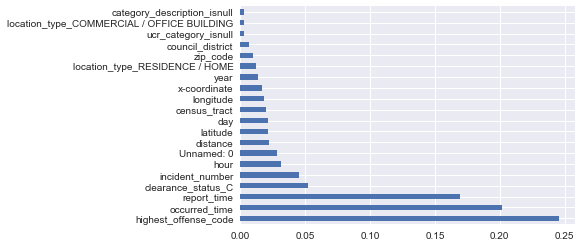

In [107]:
feat_importances = pd.Series(rf.feature_importances_,index = X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [108]:
from sklearn.feature_selection import SelectFromModel


# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(rf, threshold=0.05)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels=X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\feature_selection\_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


highest_offense_code
occurred_time
report_time
clearance_status_C


In [109]:
hyper_param_list_sfm = []

In [110]:
thresholds = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2]
for i in thresholds:
    sfm = SelectFromModel(rf, threshold=i)
    sfm.fit(X_train, y_train)
    X_important_train = sfm.transform(X_train)
    X_important_test = sfm.transform(X_test)
    rf.fit(X_important_train, y_train)
    train_score = rf.score(X_important_train, y_train)
    test_score = rf.score(X_important_test, y_test)
    hyper_params = dict(thresholds=i, train_score=train_score, test_score=test_score)
    hyper_param_list_sfm.append(hyper_params)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\feature_selection\_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\feature_selection\_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A col

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\feature_selection\_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\feature_selection\_from_model.py:222: DataConversionWarning: A column-vector y was passed when 

In [111]:
df_hyper_param_sfm= pd.DataFrame(hyper_param_list_sfm)
df_hyper_param_sfm.round(5).sort_values('test_score')

,thresholds,train_score,test_score
19,0.20,0.37686,0.35450
17,0.18,0.79273,0.36613
18,0.19,0.79236,0.36732
0,0.01,0.95815,0.70398
1,0.02,0.96233,0.73554
2,0.03,0.96888,0.78741
3,0.04,0.96903,0.78786
4,0.05,0.96960,0.79723
5,0.06,0.96922,0.80093
7,0.08,0.96931,0.80097


In [112]:
print(rf.score(X_important_test, y_test))

0.3545013706831849


### Gradient Boost Regressor

In [113]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=38)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print("GradientBoostingRegressor score on the training data:{}".format(gbr.score(X_train,y_train)))

print("GradientBoostingRegressor score on the testing data:{}".format(gbr.score(X_test,y_test)))

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor score on the training data:0.6660879828231043
GradientBoostingRegressor score on the testing data:0.663737961717312


In [114]:
hyper_param_list_gbr = []

In [115]:
alphas = np.arange(0.1,2,0.1)
for alpha in alphas:
    gbr = GradientBoostingRegressor(ccp_alpha=alpha)
    gbr.fit(X_train, y_train)
    train_score = gbr.score(X_train, y_train)
    test_score = gbr.score(X_test, y_test)
    hyper_params = dict(alpha=alpha, train_score=train_score, test_score=test_score)
    hyper_param_list_gbr.append(hyper_params)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was 

In [116]:
df_hyper_param_gbr= pd.DataFrame(hyper_param_list_gbr)
df_hyper_param_gbr.round(5).sort_values('test_score')

,alpha,train_score,test_score
16,1.7,0.66609,0.66364
6,0.7,0.66609,0.66364
1,0.2,0.66609,0.66365
5,0.6,0.66609,0.66366
17,1.8,0.66609,0.66366
14,1.5,0.66609,0.66367
12,1.3,0.66609,0.66369
11,1.2,0.66609,0.66369
9,1.0,0.66609,0.66370
13,1.4,0.66609,0.66370


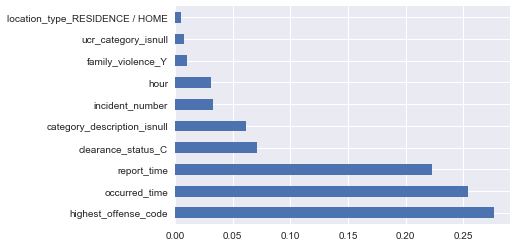

In [117]:
feat_importances = pd.Series(gbr.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [118]:
hyper_param_list_gbr2 = []

In [119]:
thresholds = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12]
for i in thresholds:
    sfm = SelectFromModel(gbr, threshold=i)
    sfm.fit(X_train, y_train)
    X_important_train = sfm.transform(X_train)
    X_important_test = sfm.transform(X_test)
    gbr.fit(X_important_train, y_train)
    train_score = gbr.score(X_important_train, y_train)
    test_score = gbr.score(X_important_test, y_test)
    hyper_params = dict(thresholds=i, train_score=train_score, test_score=test_score)
    hyper_param_list_gbr2.append(hyper_params)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was 

In [120]:
df_hyper_param_gbr2= pd.DataFrame(hyper_param_list_gbr2)
df_hyper_param_gbr2.round(5).sort_values('test_score')

,thresholds,train_score,test_score
7,0.08,0.68439,0.68442
8,0.09,0.68439,0.68442
9,0.10,0.68439,0.68442
10,0.11,0.68439,0.68442
11,0.12,0.68439,0.68442
6,0.07,0.68291,0.68475
0,0.01,0.68580,0.68632
2,0.03,0.68629,0.68642
1,0.02,0.68629,0.68646
3,0.04,0.69377,0.69314


### Extra Tree Regressor

In [121]:
# Extra Tree Regressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=100)
model.fit(X_train,y_train)

print("ExtraTreesRegressor score on the training data:{}".format(model.score(X_train,y_train)))

print("ExtraTreesRegressor score on the testing data:{}".format(model.score(X_test,y_test)))

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor score on the training data:1.0
ExtraTreesRegressor score on the testing data:0.6795978837722969


In [122]:
hyper_param_list_model = []

In [124]:
alphas = np.arange(0.5,10,0.5)
for alpha in alphas:
    model = ExtraTreesRegressor(ccp_alpha=alpha)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    hyper_params = dict(alpha=alpha, train_score=train_score, test_score=test_score)
    hyper_param_list_model.append(hyper_params)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was pa

In [125]:
df_hyper_param_model= pd.DataFrame(hyper_param_list_model)
df_hyper_param_model.round(5).sort_values('test_score')

,alpha,train_score,test_score
7,3.5,1.0,0.67872
10,5.0,1.0,0.67994
9,4.5,1.0,0.68010
5,2.5,1.0,0.68079
4,2.0,1.0,0.68101
1,0.5,1.0,0.68128
12,6.0,1.0,0.68146
0,0.5,1.0,0.68180
14,7.0,1.0,0.68279
2,1.0,1.0,0.68280


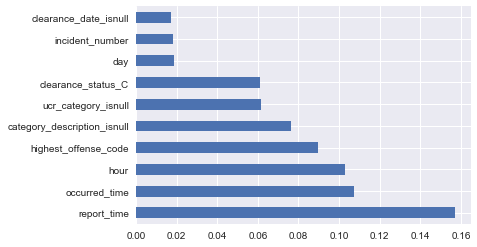

In [126]:
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [127]:
hyper_param_list_extra = []

In [ ]:
thresholds = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12]
for i in thresholds:
    sfm = SelectFromModel(model, threshold=i)
    sfm.fit(X_train, y_train)
    X_important_train = sfm.transform(X_train)
    X_important_test = sfm.transform(X_test)
    model.fit(X_important_train, y_train)
    train_score = model.score(X_important_train, y_train)
    test_score = model.score(X_important_test, y_test)
    hyper_params = dict(thresholds=i, train_score=train_score, test_score=test_score)
    hyper_param_list_extra.append(hyper_params)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\feature_selection\_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\feature_selection\_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A col

In [ ]:
df_hyper_param_extra= pd.DataFrame(hyper_param_list_extra)
df_hyper_param_extra.round(5).sort_values('test_score')

### Feature Selection

In [ ]:
# We need to check the data types of X and Xs
print(type(X))

In [ ]:
# Create a mask with Variance threshold
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)
sel.fit(X)

mask = sel.get_support()
print(mask)

In [ ]:
# We will make a hyperparameter tuning with the mask and different algorithms:
hyper_param_mask_lr = []

In [ ]:
for i in [0.0001, 0.001, 0.005,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.2]:
    sel = VarianceThreshold(threshold=i)
    sel.fit(X)
    mask = sel.get_support()
    X_reduced = X.loc[:,mask]
    X_reduced_train, X_reduced_test, y_train, y_test = train_test_split( X_reduced, y, test_size=0.20, random_state=30, stratify=y)
    lr.fit(X_reduced_train,y_train)
    train_score = lr.score(X_reduced_train, y_train)
    test_score = lr.score(X_reduced_test, y_test)
    hyper_params = dict(threshold=i, train_score=train_score, test_score=test_score)
    hyper_param_mask_lr.append(hyper_params)

df_hyper_param_mask_lr = pd.DataFrame(hyper_param_mask_lr).sort_values('test_score')
df_hyper_param_mask_lr.round(5)

In [ ]:
sel = VarianceThreshold(threshold=0.005)
sel.fit(X)
mask = sel.get_support()
X_reduced = X.loc[:,mask]
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split( X_reduced, y, test_size=0.20, random_state=30, stratify=y)

In [ ]:
# List of algorithms
algorithm_list=['Linear Regression',' Decision Tree','Random Forest','XGOost','Extra Tree']

# Create an empty list for training scores
training_scores = []

# Create an empty list for testing scores
testing_scores = []

In [ ]:
lr.fit(X_reduced_train,y_train)

print("The linear regression score on the training data:{}".format(lr.score(X_reduced_train,y_train)))
print("The linear regression score on the testing data:{}".format(lr.score(X_reduced_test,y_test)))

training_scores.append(lr.score(X_reduced_train,y_train))
testing_scores.append(lr.score(X_reduced_test,y_test))

In [ ]:
dt_regressor.fit(X_reduced_train,y_train)

print("The decision tree regression score on the training data:{}".format(dt_regressor.score(X_reduced_train,y_train)))
print("The decision tree regression score on the testing data:{}".format(dt_regressor.score(X_reduced_test,y_test)))

training_scores.append(dt_regressor.score(X_reduced_train,y_train))
testing_scores.append(dt_regressor.score(X_reduced_test,y_test))

In [ ]:
rf.fit(X_reduced_train,y_train)

print("The Random Forest regression score on the training data:{}".format(rf.score(X_reduced_train,y_train)))
print("The Random Forest regression score on the testing data:{}".format(rf.score(X_reduced_test,y_test)))

training_scores.append(rf.score(X_reduced_train,y_train))
testing_scores.append(rf.score(X_reduced_test,y_test))

In [ ]:
gbr.fit(X_reduced_train,y_train)

print("The XGBoost score on the training data:{}".format(gbr.score(X_reduced_train,y_train)))
print("The XGBoost score on the testing data:{}".format(gbr.score(X_reduced_test,y_test)))

training_scores.append(gbr.score(X_reduced_train,y_train))
testing_scores.append(gbr.score(X_reduced_test,y_test))

In [ ]:
model.fit(X_reduced_train,y_train)

print("The Extra Trees regression score on the training data:{}".format(model.score(X_reduced_train,y_train)))
print("The Extra Trees regression score on the testing data:{}".format(model.score(X_reduced_test,y_test)))

training_scores.append(model.score(X_reduced_train,y_train))
testing_scores.append(model.score(X_reduced_test,y_test))

In [ ]:
# Make a plot of the training scores for different algorithms

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algorithm_list))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_train = pd.DataFrame(list(zip(algorithm_list, training_scores)), columns=['Algorithm','Training_Score']).sort_values(by=['Training_Score'],ascending = True)

# Make a plot
ax = df_train.plot.barh('Algorithm', 'Training_Score', align='center',legend=False, color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Training Score')
plt.yticks(y_ticks, rotation=0)
plt.title(' Which algorithm performs better in training set?')

plt.show()

In [ ]:
# Make a plot of the testing scores for different algorithms

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algorithm_list))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_test = pd.DataFrame(list(zip(algorithm_list, testing_scores)), columns=['Algorithm','Testing_Score']).sort_values(by=['Testing_Score'],ascending = True)

# Make a plot
ax = df_test.plot.barh('Algorithm', 'Testing_Score', align='center',legend=False, color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Testing Score')
plt.yticks(y_ticks, rotation=0)
plt.title(' Which algorithm performs better on testing set?')

plt.show()

# Classification Models

## 2. Logistic Regression

Around 50 percent of the durations are given as 0. Which means, the incidents can be classified as 'duration zero' or 'duration is not zero'. We will define a new boolean column: as 'duration_zero', that will be genereated from the duration column.

In [ ]:
# We will create a new integer column as duration zero whether the duration is zero or not
df['duration_zero'] = np.where(df['duration']==0, 0, 1)

In [ ]:
# Let's check the value counts of each of the values
df['duration_zero'].value_counts()

In [ ]:
# We will define the target and feature names
log_target_name = ['duration_zero']
log_feature_names = [c for c in df.columns if df[c].dtype != 'object' and c not in target_name and df[c].dtype != 'datetime64[ns]' and c!= 'duration']

# We will use X and y for the feature and target variables
X_lr = df[log_feature_names]
y_lr = df[log_target_name]

In [ ]:
# We will split the set with train test split
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split( X_lr, y_lr, test_size=0.20, random_state=42)

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter=10000, penalty='l2')
logr.fit(X_lr_train, y_lr_train)

In [ ]:
print("The logistic regression score on the scale training data:{}".format(logr.score(X_lr_train,y_lr_train)))

print("The logistic regression score on the scaled testing data:{}".format(logr.score(X_lr_test,y_lr_test)))

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob = logr.predict_proba(X_lr_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_lr_test, y_pred_prob)
plt.plot(fpr, tpr, LAbel='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regession on ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
logr.fit(X_lr_train, y_lr_train)
y_pred_prob = logr.predict_proba(X_lr_test)[:,1]
roc_auc_score(y_lr_test, y_pred_prob)

In [ ]:
pd.DataFrame(logr.predict_proba(X_lr_test)).head(10)

In [ ]:
cv_scores = cross_val_score(logr, X_lr, y_lr, cv=5, scoring = 'roc_auc')
pd.DataFrame(cv_scores)

### Scaling the features

In [ ]:
# We create an empty Scaled scores
# We will firstly include our unscaled scores as a dictionary in our list
hyper_param_list_scaler = [dict(scaler="unscaled", train_score=logr.score(X_lr_train,y_lr_train), test_score=logr.score(X_lr_test,y_lr_test))]

In [ ]:
# We will do a hyperparameter tuning to see which scaler will result the best test score
scalers = [MinMaxScaler(), MaxAbsScaler(), StandardScaler(), RobustScaler(), Normalizer(), QuantileTransformer()]
for scaler in scalers:
    Xls_train = scaler.fit_transform(X_lr_train)
    Xls_test = scaler.transform(X_lr_test)
    logr.fit(Xls_train, y_lr_train)
    train_score = logr.score(Xls_train, y_lr_train)
    test_score = logr.score(Xls_test, y_lr_test)
    hyper_params = dict(scaler=scaler, train_score=train_score, test_score=test_score)
    hyper_param_list_scaler.append(hyper_params)

In [ ]:
df_hyper_param_scaler = pd.DataFrame(hyper_param_list_scaler)
df_hyper_param_scaler.round(4).sort_values('test_score')

### Decision Tree Classifier

In [ ]:
# Decision tree algorithm
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
dt_entropy.fit(X_lr_train, y_lr_train)


print("Decision tree entropy score on the training data:{}".format(dt_entropy.score(X_lr_train,y_lr_train)))

print("Decision tree entropy score on the testing data:{}".format(dt_entropy.score(X_lr_test,y_lr_test)))

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_lr_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_lr_test, y_pred)


# Print accuracy_entropy
print('Decision Tree -- entropy accuracy_score: {:.3f}.'.format(accuracy_entropy))

### Random Forest Clasifier

In [ ]:
#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_lr_train,y_lr_train)

y_pred=clf.predict(X_lr_test)


# Get the accuracy score
acc=accuracy_score(y_lr_test, y_pred)


# Model Accuracy, how often is the classifier correct?
print("[Random forest algorithm] accuracy_score: {:.5f}.".format(acc))

print("The clf score on the training data:{}".format(clf.score(X_lr_train,y_lr_train)))

print("The clf regression score on the testing data:{}".format(clf.score(X_lr_test,y_lr_test)))